# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("total_data.csv")

In [3]:
data.head()

,Date,retailer,Retailer Name,Street Addr Address,Street Addr City,Street Addr County,Street Addr State,Street Addr Zip,Business Type,Total Instant Sales,...,LFL Sales Count,Instant Cashes Count,P3 Cashes Count,P4 Cashes Count,Powerball Cashes Count,PC5 Cashes Count,APLY Cashes Count,MegaM Cashes Count,LFL Cashes Count,fraud
0,2018-05-13,100048,Spartan Spot Food Store,7558 Asheville Hwy,Spartanburg,SPARTANBURG,SC,29303,Grocery / Food Store,1200,...,0,48,0,0,0,0,0,0,0,0
1,2018-05-13,100091,Jacks Convenience Store of Lancaster Inc,2190 Pageland Hwy,Lancaster,LANCASTER,SC,29720,Grocery / Food Store,0,...,0,58,0,0,0,2,0,0,0,0
2,2018-05-13,100093,Eagle Express,1600 Airport Blvd,West Columbia,LEXINGTON,SC,29169,C-Store w/Gas,0,...,1,33,0,0,0,0,0,0,0,0
3,2018-05-13,100095,Oasis One Stop,1950 N Main St.,SUMMERVILLE,BERKELEY,SC,29486,Grocery / Food Store,600,...,0,12,0,0,2,1,0,0,0,0
4,2018-05-13,100097,Jims Variety Inc,719 E McGregor St,Pageland,CHESTERFIELD,SC,29728,None,1200,...,0,27,0,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['Date', 'retailer', 'Retailer Name', 'Street Addr Address',
       'Street Addr City', 'Street Addr County', 'Street Addr State',
       'Street Addr Zip', 'Business Type', 'Total Instant Sales',
       'Total Online Sales', 'Total Instant Cashes', 'Total Online Cashes',
       'P3 Sales', 'P4 Sales', 'Powerball Sales', 'PC5 Sales', 'APLY Sales',
       'Mega Millions Sales', 'LFL Sales', 'P3 Cashes', 'P4 Cashes',
       'Powerball Cashes', 'PC5 Cashes', 'APLY Cashes', 'Mega Millions Cashes',
       'LFL Cashes', 'P3 Sales Count', 'P3 Sales Cancel', 'P4 Sales Count',
       'P4 Sales Cancel', 'Powerball Sales Count', 'PC5 Sales Count',
       'APLY Sales Count', 'MegaM Sales Count', 'LFL Sales Count',
       'Instant Cashes Count', 'P3 Cashes Count', 'P4 Cashes Count',
       'Powerball Cashes Count', 'PC5 Cashes Count', 'APLY Cashes Count',
       'MegaM Cashes Count', 'LFL Cashes Count', 'fraud'],
      dtype='object')

In [5]:
data.describe()

,retailer,Street Addr Zip,Total Instant Sales,Total Online Sales,Total Instant Cashes,Total Online Cashes,P3 Sales,P4 Sales,Powerball Sales,PC5 Sales,...,LFL Sales Count,Instant Cashes Count,P3 Cashes Count,P4 Cashes Count,Powerball Cashes Count,PC5 Cashes Count,APLY Cashes Count,MegaM Cashes Count,LFL Cashes Count,fraud
count,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,...,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2.333437e+06,2333437.0,2.333437e+06,2.333437e+06,2.333437e+06
mean,2.329492e+05,2.946364e+04,1.058989e+03,3.807565e+02,7.292654e+02,1.144298e+02,1.646935e+02,7.953075e+01,6.115884e+01,1.761292e+01,...,2.343986e+00,4.645935e+01,5.441304e-01,9.300315e-02,7.510209e-01,9.047491e-01,0.0,6.254954e-01,4.582652e-01,1.804206e-04
std,4.242310e+04,2.440210e+02,1.093131e+03,4.288924e+02,7.411388e+02,3.327392e+02,2.299911e+02,1.101214e+02,1.094162e+02,2.586527e+01,...,3.782198e+00,3.829956e+01,1.340072e+00,4.178444e-01,1.368476e+00,1.717499e+00,0.0,1.665024e+00,1.048709e+00,1.343086e-02
min,1.000290e+05,2.900100e+04,-9.450000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.394760e+05,2.922300e+04,3.000000e+02,1.255000e+02,2.680000e+02,3.000000e+00,3.050000e+01,1.300000e+01,9.000000e+00,3.000000e+00,...,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.507310e+05,2.950100e+04,9.000000e+02,2.565000e+02,5.210000e+02,1.700000e+01,8.600000e+01,4.100000e+01,2.900000e+01,1.000000e+01,...,1.000000e+00,3.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.525190e+05,2.964600e+04,1.500000e+03,4.845000e+02,9.400000e+02,8.000000e+01,2.065000e+02,1.020000e+02,7.300000e+01,2.300000e+01,...,3.000000e+00,6.100000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00
max,2.542400e+05,2.994500e+04,3.855000e+04,2.122450e+04,2.406700e+04,3.750200e+04,6.379500e+03,3.615000e+03,1.169300e+04,3.107000e+03,...,4.210000e+02,8.960000e+02,9.000000e+01,1.010000e+02,1.160000e+02,4.440000e+02,0.0,2.140000e+02,9.100000e+01,1.000000e+00


In [6]:
data.fraud.value_counts(1)

0    0.99982
1    0.00018
Name: fraud, dtype: float64

In [7]:
data = data.drop(['Date','Retailer Name', 'Street Addr Address', 'Street Addr City',
                   'Street Addr County', 'Street Addr State','APLY Cashes Count','APLY Cashes','APLY Sales Count','APLY Sales'],
                 axis = 1)

In [8]:
data.head()

,retailer,Street Addr Zip,Business Type,Total Instant Sales,Total Online Sales,Total Instant Cashes,Total Online Cashes,P3 Sales,P4 Sales,Powerball Sales,...,MegaM Sales Count,LFL Sales Count,Instant Cashes Count,P3 Cashes Count,P4 Cashes Count,Powerball Cashes Count,PC5 Cashes Count,MegaM Cashes Count,LFL Cashes Count,fraud
0,100048,29303,Grocery / Food Store,1200,7.0,803,0,4.0,1.0,0,...,0,0,48,0,0,0,0,0,0,0
1,100091,29720,Grocery / Food Store,0,34.0,694,20,10.0,3.0,8,...,1,0,58,0,0,0,2,0,0,0
2,100093,29169,C-Store w/Gas,0,214.5,465,0,157.0,37.5,6,...,1,1,33,0,0,0,0,0,0,0
3,100095,29486,Grocery / Food Store,600,49.0,93,18,21.0,14.0,8,...,0,0,12,0,0,2,1,0,0,0
4,100097,29728,None,1200,53.0,244,0,37.0,16.0,0,...,0,0,27,0,0,0,0,0,0,0


# Experimet 3 - Data Update: Retailer specific models

In [9]:
retailer_fraud = data.groupby("retailer").agg({'fraud':['count','sum']})
retailer_fraud = retailer_fraud.reset_index()
retailer_fraud.columns= ['retailer','Count','NoOfFraud']

In [10]:
retailer_fraud[(retailer_fraud['NoOfFraud'] >=1)]

,retailer,Count,NoOfFraud
51,100443,634,1
52,100444,631,2
76,100475,633,1
77,100476,633,1
131,100827,633,2
134,100831,633,1
156,100957,628,7
174,100979,633,3
204,101019,633,1
235,101229,632,2


In [11]:
retailer_fraud = retailer_fraud.sort_values(by = ['NoOfFraud'], ascending= False)
retailer_fraud

,retailer,Count,NoOfFraud
1172,246664,625,65
2969,252325,631,29
1967,250605,629,27
3861,253567,275,22
3527,253145,632,21
3125,252605,629,17
2471,251574,635,15
3347,252911,633,15
4100,253817,323,11
2118,250838,633,11


In [13]:
df_retailer_maxfraud = data[data['retailer']==246664]
df_retailer_maxfraud.fraud.value_counts(1)

0    0.896
1    0.104
Name: fraud, dtype: float64

In [14]:
data_trial = df_retailer_maxfraud

In [15]:
# data_copy = data.copy()
# fraud = data_copy[data_copy.fraud==1]
# fraud = fraud[['retailer']]
# data_trial = data_copy[data_copy.retailer.isin(fraud['retailer'])]
# # data_trial.fraud.value_counts()

In [16]:
data.fraud.value_counts(1)

0    0.99982
1    0.00018
Name: fraud, dtype: float64

In [17]:
len(data_trial)

625

In [18]:
data_trial.columns

Index(['retailer', 'Street Addr Zip', 'Business Type', 'Total Instant Sales',
       'Total Online Sales', 'Total Instant Cashes', 'Total Online Cashes',
       'P3 Sales', 'P4 Sales', 'Powerball Sales', 'PC5 Sales',
       'Mega Millions Sales', 'LFL Sales', 'P3 Cashes', 'P4 Cashes',
       'Powerball Cashes', 'PC5 Cashes', 'Mega Millions Cashes', 'LFL Cashes',
       'P3 Sales Count', 'P3 Sales Cancel', 'P4 Sales Count',
       'P4 Sales Cancel', 'Powerball Sales Count', 'PC5 Sales Count',
       'MegaM Sales Count', 'LFL Sales Count', 'Instant Cashes Count',
       'P3 Cashes Count', 'P4 Cashes Count', 'Powerball Cashes Count',
       'PC5 Cashes Count', 'MegaM Cashes Count', 'LFL Cashes Count', 'fraud'],
      dtype='object')

In [19]:
#Building new features

data_trial['Validation_Ratio'] = data_trial['Total Instant Cashes'] / data_trial['Instant Cashes Count'] 

In [20]:
print(data_trial.Validation_Ratio.max())
print(data_trial.Validation_Ratio.min())

58.03030303030303
6.8076923076923075


In [21]:
data_trial[data_trial['Validation_Ratio'].isna()]['fraud'].value_counts()

Series([], Name: fraud, dtype: int64)

In [22]:
data_trial.Validation_Ratio.fillna(data_trial.Validation_Ratio.mean(), inplace=True)

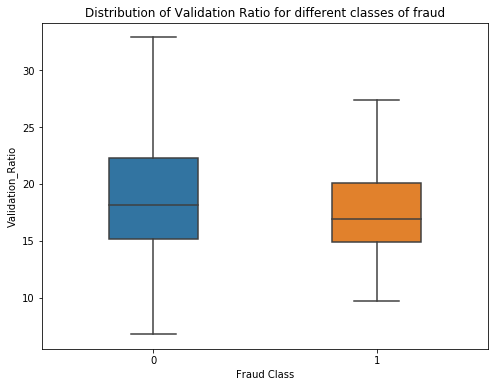

In [25]:
# Box plot to check spread of values amongst the two classes
fig = plt.figure(figsize = [8,6])
ax = sns.boxplot(x=data_trial['fraud'], y=data_trial['Validation_Ratio'],width=0.4,showfliers=False)
ax.set_xlabel("Fraud Class")
ax.set_ylabel("Validation_Ratio")
ax.set_title("Distribution of Validation Ratio for different classes of fraud");

In [26]:
#Feature 2
data_trial['ValidationToSale_Ratio'] = data_trial['Total Instant Cashes'] / data_trial['Total Instant Sales'] 

In [27]:
data_trial[data_trial['ValidationToSale_Ratio'] == np.inf]['fraud'].value_counts()

0    21
1     1
Name: fraud, dtype: int64

In [28]:
data_trial[data_trial['ValidationToSale_Ratio'].isna()]['fraud'].value_counts()

Series([], Name: fraud, dtype: int64)

In [29]:
data_trial = data_trial[-data_trial['ValidationToSale_Ratio'].isna()]

In [30]:
data_trial = data_trial.replace(np.inf, np.nan)

In [31]:
data_trial.ValidationToSale_Ratio.fillna(data_trial.ValidationToSale_Ratio.mean(), inplace=True)

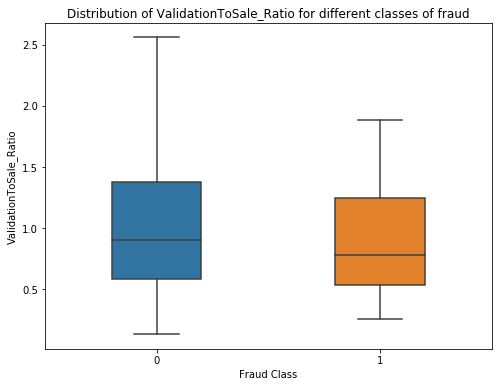

In [32]:
fig = plt.figure(figsize = [8,6])
ax = sns.boxplot(x=data_trial['fraud'], y=data_trial['ValidationToSale_Ratio'],width=0.4,showfliers=False)
ax.set_xlabel("Fraud Class")
ax.set_ylabel("ValidationToSale_Ratio")
ax.set_title("Distribution of ValidationToSale_Ratio for different classes of fraud");

In [33]:
data_trial['Business Type'].value_counts()

Grocery / Food Store    625
Name: Business Type, dtype: int64

In [34]:
unique_bussines = data_trial['Business Type'].unique()
cat_features = ['Business Type']
print(data_trial.shape)
data_trial = pd.get_dummies(data_trial,columns=cat_features)
print(data_trial.shape)

(625, 37)
(625, 37)


In [35]:
#Train -Test split (80-20)
train, test= train_test_split(data_trial,train_size = 0.8,random_state=123)
print(train.shape)
print(test.shape)
print(train.fraud.value_counts(1))
print(test.fraud.value_counts(1))

(500, 37)
(125, 37)
0    0.9
1    0.1
Name: fraud, dtype: float64
0    0.88
1    0.12
Name: fraud, dtype: float64


In [36]:
train_Y = train['fraud']
train_X = train.drop('fraud', axis = 1)

test_Y = test['fraud']
test_X = test.drop('fraud', axis = 1)

# Gradient Boosting

In [37]:

model1 = GradientBoostingClassifier(n_estimators=500,learning_rate=0.01,random_state=11)
model1.fit(train_X, train_Y)

train_predicted = model1.predict(train_X)
test_predicted = model1.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))

Train Results:
0.952
[[450   0]
 [ 24  26]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       450
           1       1.00      0.52      0.68        50

    accuracy                           0.95       500
   macro avg       0.97      0.76      0.83       500
weighted avg       0.95      0.95      0.95       500


Test Results:
0.896
[[110   0]
 [ 13   2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.13      0.24        15

    accuracy                           0.90       125
   macro avg       0.95      0.57      0.59       125
weighted avg       0.91      0.90      0.86       125



In [38]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':model1.predict(test_X),'Predicted_prob_class1':model1.predict_proba(test_X)[:,1]})

In [39]:
#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn

,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,125,15,0.120000,1.000000
1,0.1,34,8,0.235294,0.533333
2,0.2,13,6,0.461538,0.400000
3,0.3,7,5,0.714286,0.333333
4,0.4,4,4,1.000000,0.266667
5,0.5,2,2,1.000000,0.133333
6,0.6,2,2,1.000000,0.133333
7,0.7,2,2,1.000000,0.133333
8,0.8,1,1,1.000000,0.066667
9,0.9,0,0,NaN,0.000000


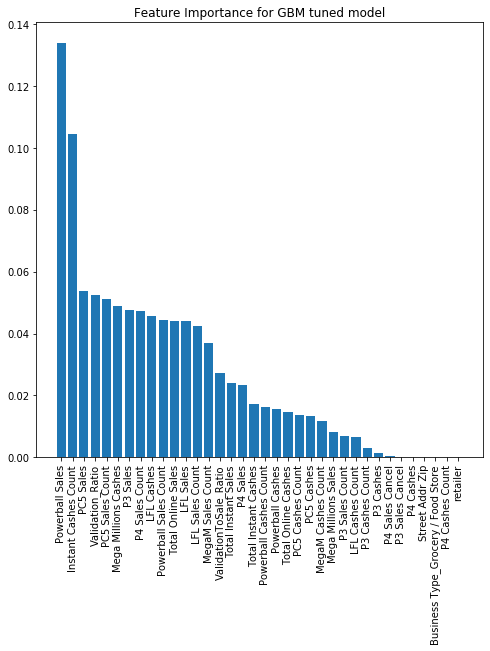

In [40]:
#Feature Importances

plt.figure(figsize=(8,8))

importances = model1.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_X.columns[i] for i in indices]

# Create plot title
plt.title("Feature Importance for GBM tuned model")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90);


In [41]:
train_Y.value_counts()

0    450
1     50
Name: fraud, dtype: int64

In [46]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':model1.predict(test_X),'Predicted_prob_class1':model1.predict_proba(test_X)[:,1]})

# Neural Net

In [48]:
#neural network classification base model
nn = MLPClassifier()

#fit data
nn.fit(train_X, train_Y) 

#predict test
train_predicted = nn.predict(train_X)
test_predicted = nn.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9
[[450   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       450
           1       0.00      0.00      0.00        50

    accuracy                           0.90       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.81      0.90      0.85       500


Test Results:
0.88
[[110   0]
 [ 15   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       110
           1       0.00      0.00      0.00        15

    accuracy                           0.88       125
   macro avg       0.44      0.50      0.47       125
weighted avg       0.77      0.88      0.82       125



In [49]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,'Predicted':nn.predict(test_X),'Predicted_prob_class1':nn.predict_proba(test_X)[:,1]})

In [50]:
#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn

,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,125,15,0.12,1.0
1,0.1,0,0,NaN,0.0
2,0.2,0,0,NaN,0.0
3,0.3,0,0,NaN,0.0
4,0.4,0,0,NaN,0.0
5,0.5,0,0,NaN,0.0
6,0.6,0,0,NaN,0.0
7,0.7,0,0,NaN,0.0
8,0.8,0,0,NaN,0.0
9,0.9,0,0,NaN,0.0


In [51]:
# Logistic 

LRClassifier = LogisticRegression(random_state=11, solver='lbfgs', C=10, max_iter=5000)
#fit data
LRClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = LRClassifier.predict(train_X)
test_predicted = LRClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9
[[447   3]
 [ 47   3]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       450
           1       0.50      0.06      0.11        50

    accuracy                           0.90       500
   macro avg       0.70      0.53      0.53       500
weighted avg       0.86      0.90      0.86       500


Test Results:
0.88
[[109   1]
 [ 14   1]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       110
           1       0.50      0.07      0.12        15

    accuracy                           0.88       125
   macro avg       0.69      0.53      0.53       125
weighted avg       0.84      0.88      0.84       125



In [52]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':LRClassifier.predict(test_X),
                                      'Predicted_prob_class1':LRClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,125,15,0.120000,1.000000
1,0.1,45,7,0.155556,0.466667
2,0.2,10,3,0.300000,0.200000
3,0.3,8,2,0.250000,0.133333
4,0.4,2,1,0.500000,0.066667
5,0.5,2,1,0.500000,0.066667
6,0.6,2,1,0.500000,0.066667
7,0.7,2,1,0.500000,0.066667
8,0.8,2,1,0.500000,0.066667
9,0.9,1,1,1.000000,0.066667


In [53]:
# K neighbour

from sklearn.neighbors import KNeighborsClassifier

KNNClassifier = KNeighborsClassifier(n_neighbors=15)
KNNClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = KNNClassifier.predict(train_X)
test_predicted = KNNClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.9
[[450   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       450
           1       0.00      0.00      0.00        50

    accuracy                           0.90       500
   macro avg       0.45      0.50      0.47       500
weighted avg       0.81      0.90      0.85       500


Test Results:
0.88
[[110   0]
 [ 15   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       110
           1       0.00      0.00      0.00        15

    accuracy                           0.88       125
   macro avg       0.44      0.50      0.47       125
weighted avg       0.77      0.88      0.82       125



In [54]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':KNNClassifier.predict(test_X),
                                      'Predicted_prob_class1':KNNClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,125,15,0.120000,1.000000
1,0.1,59,9,0.152542,0.600000
2,0.2,29,6,0.206897,0.400000
3,0.3,1,1,1.000000,0.066667
4,0.4,0,0,NaN,0.000000
5,0.5,0,0,NaN,0.000000
6,0.6,0,0,NaN,0.000000
7,0.7,0,0,NaN,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000


In [55]:
from sklearn.ensemble import RandomForestClassifier

RFClassifier = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=11)
RFClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = RFClassifier.predict(train_X)
test_predicted = RFClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))


Train Results:
0.914
[[450   0]
 [ 43   7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       450
           1       1.00      0.14      0.25        50

    accuracy                           0.91       500
   macro avg       0.96      0.57      0.60       500
weighted avg       0.92      0.91      0.88       500


Test Results:
0.888
[[110   0]
 [ 14   1]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       110
           1       1.00      0.07      0.12        15

    accuracy                           0.89       125
   macro avg       0.94      0.53      0.53       125
weighted avg       0.90      0.89      0.84       125



In [56]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':RFClassifier.predict(test_X),
                                      'Predicted_prob_class1':RFClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,125,15,0.120000,1.000000
1,0.1,55,9,0.163636,0.600000
2,0.2,9,5,0.555556,0.333333
3,0.3,2,2,1.000000,0.133333
4,0.4,2,2,1.000000,0.133333
5,0.5,1,1,1.000000,0.066667
6,0.6,0,0,NaN,0.000000
7,0.7,0,0,NaN,0.000000
8,0.8,0,0,NaN,0.000000
9,0.9,0,0,NaN,0.000000


In [57]:
from sklearn.svm import SVC

SVMClassifier = SVC(C=10, kernel='linear', random_state=11,probability=True)

SVMClassifier.fit(train_X, train_Y) 

#predict test
train_predicted = SVMClassifier.predict(train_X)
test_predicted = SVMClassifier.predict(test_X)

#Train Accuracy
print("Train Results:")
print(accuracy_score(train_Y, train_predicted))
print(confusion_matrix(train_Y, train_predicted))
print(classification_report(train_Y, train_predicted))

#Test Accuracy
print()
print("Test Results:")
print(accuracy_score(test_Y, test_predicted))
print(confusion_matrix(test_Y, test_predicted))
print(classification_report(test_Y, test_predicted))

Train Results:
0.892
[[444   6]
 [ 48   2]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       450
           1       0.25      0.04      0.07        50

    accuracy                           0.89       500
   macro avg       0.58      0.51      0.51       500
weighted avg       0.84      0.89      0.86       500


Test Results:
0.872
[[108   2]
 [ 14   1]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       110
           1       0.33      0.07      0.11        15

    accuracy                           0.87       125
   macro avg       0.61      0.52      0.52       125
weighted avg       0.82      0.87      0.83       125



In [58]:
test_actual_predicted = pd.DataFrame({'Actual':test_Y,
                                      'Predicted':SVMClassifier.predict(test_X),
                                      'Predicted_prob_class1':SVMClassifier.predict_proba(test_X)[:,1]})

#Threshold Analysis for class 'fraud'

actual_1 = (test_actual_predicted.Actual == 1).sum()
i=0
frame = []
while i<=0.9:
    req = test_actual_predicted[test_actual_predicted['Predicted_prob_class1']>=i]
    actualfraud =  (req.Actual ==1).sum() 
    recall = (req.Actual ==1).sum() / actual_1
    precision = (req.Actual ==1).sum() / len(req)
    ls = i,len(req),actualfraud,precision,recall
    frame.append(list(ls))
    i+=0.1
resultFn = pd.DataFrame(frame,columns=['Threshold','TotalRecords','ActualFraudCaptured','Precision','Recall'])
resultFn


,Threshold,TotalRecords,ActualFraudCaptured,Precision,Recall
0,0.0,125,15,0.120000,1.000000
1,0.1,23,4,0.173913,0.266667
2,0.2,5,2,0.400000,0.133333
3,0.3,2,1,0.500000,0.066667
4,0.4,1,1,1.000000,0.066667
5,0.5,1,1,1.000000,0.066667
6,0.6,1,1,1.000000,0.066667
7,0.7,1,1,1.000000,0.066667
8,0.8,1,1,1.000000,0.066667
9,0.9,1,1,1.000000,0.066667


In [59]:
test_actual_predicted

,Actual,Predicted,Predicted_prob_class1
2308422,0,0,0.091387
1695202,0,0,0.074345
1580119,0,0,0.160879
2215617,0,0,0.113780
1269152,1,0,0.087341
1509701,0,0,0.092700
1295020,1,0,0.081564
507475,0,0,0.191236
573617,0,1,0.252146
1420768,1,0,0.100317


In [60]:
#Classifying transactions into different risk levels of being fradualent

thresh_red = 0.6
thresh_yellow = 0.2

def classify_transaction(x):
    if x >= thresh_red:
        return "Red"
    elif x >= thresh_yellow:
        return "Yellow"
    else:
        return "Green"

In [61]:
test_actual_predicted['RiskClass'] = test_actual_predicted['Predicted_prob_class1'].apply(classify_transaction)

In [62]:
test_actual_predicted

,Actual,Predicted,Predicted_prob_class1,RiskClass
2308422,0,0,0.091387,Green
1695202,0,0,0.074345,Green
1580119,0,0,0.160879,Green
2215617,0,0,0.113780,Green
1269152,1,0,0.087341,Green
1509701,0,0,0.092700,Green
1295020,1,0,0.081564,Green
507475,0,0,0.191236,Green
573617,0,1,0.252146,Yellow
1420768,1,0,0.100317,Green


In [63]:
test_actual_predicted.RiskClass.value_counts()

Green     120
Yellow      4
Red         1
Name: RiskClass, dtype: int64

In [64]:
test_actual_predicted.RiskClass.value_counts(1)

Green     0.960
Yellow    0.032
Red       0.008
Name: RiskClass, dtype: float64

In [65]:
# Cross table for Actual Fraud information against predicted risk level
pd.crosstab(index=test_actual_predicted["Actual"], columns=test_actual_predicted["RiskClass"])

RiskClass,Green,Red,Yellow
Actual,,,
0,107,0,3
1,13,1,1
